### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the data
hr_df = pd.read_csv( 'C:/Users/ChandraMouli/Desktop/Advanced Big Data Science/Logistic Regression/HR_comma_sep.csv' )

In [4]:
hr_df.columns

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'department', u'salary'],
      dtype='object')

In [5]:
hr_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#missings
hr_df.isnull().any().sum()

In [7]:
hr_df.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
left                     0.00    1.0  
promotion_last_5years    0.00    1.0

The summary statistics for Work_accident, left and promotion_last_5years does not make sense, as they are categorical variables

### EXPLORATORY ANALYSIS

In [ ]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

In [ ]:
#1. What is the percentage of churn by salary bucket

In [ ]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

In [ ]:
salary_count

In [ ]:
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [ ]:
salary_percent

In [ ]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [ ]:
sn.barplot( hr_left_df.index, hr_left_df.left )

In [ ]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sn.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")


In [ ]:
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size()
work_accident_percent = work_accident_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [ ]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

In [ ]:
sn.factorplot(x="Work_accident", y = 'percent', hue="left", data=work_accident_percent,
               size=4, kind="bar", palette="muted")

In [ ]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sn.distplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sn.distplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')

In [ ]:
#4. How satisfaction levels influence whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.left == 1]['satisfaction_level'], color = 'r')

It can be noted, large number of people who had lower satisfaction levels, have left the company. 
Especially, people who have satisfaction level less than 0.5. This makes sense. But there is also a surge in 
at higher level of satisfaction. Need to understand and deal with these employees with a different stategy.

In [ ]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

In [ ]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

In [ ]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

In [ ]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br>
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying   

In [ ]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

The test establishes that the average satisfaction levels are different.

In [ ]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sn.distplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sn.distplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')

People with low evaluation and very high evaluation are leaving, where as people with average evaluation scores are staying back. That seems interesting.

In [ ]:
# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = time_spend_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
time_spend_percent.columns = ['time_spend_company', 'left', 'percent']

In [ ]:
sn.factorplot(x="time_spend_company", y = 'percent', hue="left", data=time_spend_percent,
               size=4, kind="bar", palette="muted")

People who have spent 2 years are not leaving the company. But as experience grows people start leaving and highest after they spend 5 years in the company. But once they cross the golden years '7', they are not leaving.

In [ ]:
# 8. Which department has maximum attrition?

dept_count = hr_df[['department', 'left']].groupby(['department', 'left']).size()
dept_count_percent = dept_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
dept_count_percent.columns = ['dept', 'left', 'percent']
sn.factorplot(y="dept",
            x = 'percent',
            hue="left",
            data = dept_count_percent,
            size=6,
            kind="bar",
            palette="muted")

The percentage of people leaving the company is evenly distributed across all depts. Surprisingly, the percentage is high in HR itself. Lowest in management.

In [ ]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )

In [ ]:
sn.factorplot(x="promotion_last_5years", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

Very few people who got promoted in last 5 years left the company, compared to people who are not promoted in last 5 years

In [ ]:
#10.  How Salary is influencing attrition decisions?
sn.factorplot(x="salary", hue = 'left', data=hr_df,
               size=4, kind="count", palette="muted")

In [ ]:
#11. Does higher salary lead to higher satisfaction level?
sn.distplot( hr_df[hr_df.salary == 'low']['satisfaction_level'], color = 'b')
sn.distplot( hr_df[hr_df.salary == 'medium']['satisfaction_level'], color = 'g')
sn.distplot( hr_df[hr_df.salary == 'high']['satisfaction_level'], color = 'r')

In [ ]:
#12.How salaries across departments are related to attrition?
sn.factorplot( y = "department",
            col="salary",
            hue = "left",
            data=hr_df,
            kind="count",
            size=5)

No surprises. People with lowers salary have maximum percentage of exodus, while people with higher salary the exodus is least.

In [ ]:
# 13. Lets check corrleation between Variables
corrmat = hr_df.corr()
f, ax = plt.pyplot.subplots(figsize=(6, 6))
sn.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.pyplot.show()

# Some key observations:
Satisfaction level reduces as people spend more time in the company. Also, interestingly when they work on more number of projects. <br>
Evaluation score is positively correlated with spending more montly hours and number of projects. <br>
As satisfaction level reduces, people tend to leave company <br>

### PREDICTIVE MODEL: Build a model to predict if an employee will leave the company

In [ ]:
hr_df.columns

In [ ]:
hr_df.head()

In [8]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [9]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [10]:
for c_feature in categorical_features:
  hr_df = create_dummies( hr_df, c_feature )

In [11]:
hr_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  left  Work_accident_1  promotion_last_5years_1  \
0                   3     1                0                        0   
1                   6     1                0                        0   
2                   4     1                0                        0   
3                   5     1                0                        0   
4                   3     1                0                        0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  salary_low  \
0                 1                   0                     0           1   
1                 1                   0                     0           0   
2                 1                   0                     0           0   
3                 1                   0                     0           1   
4                 1                   0                     0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [12]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns

Index([u'Work_accident_1', u'average_montly_hours', u'department_RandD',
       u'department_accounting', u'department_hr', u'department_management',
       u'department_marketing', u'department_product_mng', u'department_sales',
       u'department_support', u'department_technical', u'last_evaluation',
       u'number_project', u'promotion_last_5years_1', u'salary_low',
       u'salary_medium', u'satisfaction_level', u'time_spend_company'],
      dtype='object')

In [13]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logreg.coef_

array([[-1.49266227,  0.00497563, -0.57076363,  0.09300301,  0.35887704,
        -0.36238815,  0.1304743 ,  0.02380916,  0.0758418 ,  0.13493943,
         0.19545538,  0.59258574, -0.30373341, -1.21727936,  1.81317255,
         1.30886189, -4.10826754,  0.26529853]])

In [17]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622659264606),
 ('average_montly_hours', 0.0049756306487029637),
 ('department_RandD', -0.57076362572504025),
 ('department_accounting', 0.093003010335066735),
 ('department_hr', 0.35887704320325536),
 ('department_management', -0.36238814510653666),
 ('department_marketing', 0.13047430429744139),
 ('department_product_mng', 0.023809160127111092),
 ('department_sales', 0.075841800523843247),
 ('department_support', 0.13493942577306295),
 ('department_technical', 0.19545537758819428),
 ('last_evaluation', 0.59258573746066556),
 ('number_project', -0.30373340935550674),
 ('promotion_last_5years_1', -1.2172793589365365),
 ('salary_low', 1.8131725510337624),
 ('salary_medium', 1.3088618866113126),
 ('satisfaction_level', -4.1082675418736914),
 ('time_spend_company', 0.26529852861389602)]

In [19]:
logreg.intercept_

array([-1.53003327])

In [29]:
logreg.predict_proba(test_X)

array([[ 0.97203474,  0.02796526],
       [ 0.91779184,  0.08220816],
       [ 0.77044183,  0.22955817],
       ..., 
       [ 0.89504186,  0.10495814],
       [ 0.88543807,  0.11456193],
       [ 0.60708574,  0.39291426]])

In [20]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [21]:
hr_test_pred

actual  predicted
6723        0          0
6473        0          0
4679        0          0
862         1          0
7286        0          0
8127        0          0
3017        0          0
3087        0          1
6425        0          0
2250        0          1
542         1          0
9293        0          0
11723       0          0
4923        0          0
12070       1          0
10602       0          0
11874       0          0
11118       0          0
10778       0          0
8054        0          0
2312        0          0
14768       1          0
1889        1          1
8990        0          0
169         1          0
1795        1          0
14303       1          0
3919        0          0
14018       0          0
3728        0          0
...       ...        ...
11562       0          0
8009        0          0
10076       0          0
9129        0          0
8091        0          0
6805        0          0
12174       1          0
13065       0          0
3784        0          0
8280        0          0
3577        0          0
5151        0          0
4984        0          0
420         1          1
4447        0          0
3822        0          0
4819        0          0
1496        1          1
1047        1          0
11617       0          0
8719        0          0
856         1          1
9822        0          0
3944        0          0
8192        0          0
3297        0          0
14113       0          0
5514        0          0
9939        0          0
14346       1          0

[3000 rows x 2 columns]

In [22]:

hr_test_pred = hr_test_pred.reset_index()

In [23]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

index  actual  predicted
274    3014       0          0
265    4696       0          0
2888   3322       0          0
2178   7872       0          0
252    1346       1          0
1870   1983       1          0
2551   9457       0          0
1173   4822       0          0
1431   2954       0          0
2873  10210       0          0

In [24]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

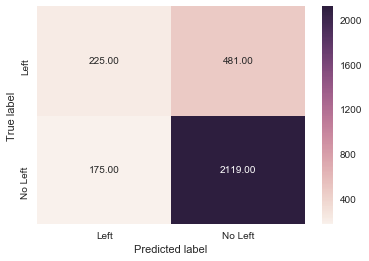

In [26]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [ ]:
# Predit Probability
print test_X[:1]
print logreg.predict_proba( test_X[:1] )

The model is predicting the probability of him leaving the company is only 0.027, which is very low.

In [30]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

0         1
0  0.972035  0.027965
1  0.917792  0.082208
2  0.770442  0.229558
3  0.523038  0.476962
4  0.975843  0.024157

In [31]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [32]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [33]:
hr_test_pred

index  actual  predicted    Left_0    Left_1
0      6723       0          0  0.972035  0.027965
1      6473       0          0  0.917792  0.082208
2      4679       0          0  0.770442  0.229558
3       862       1          0  0.523038  0.476962
4      7286       0          0  0.975843  0.024157
5      8127       0          0  0.722851  0.277149
6      3017       0          0  0.985596  0.014404
7      3087       0          1  0.130254  0.869746
8      6425       0          0  0.769714  0.230286
9      2250       0          1  0.398617  0.601383
10      542       1          0  0.849762  0.150238
11     9293       0          0  0.976874  0.023126
12    11723       0          0  0.544752  0.455248
13     4923       0          0  0.837303  0.162697
14    12070       1          0  0.751747  0.248253
15    10602       0          0  0.650987  0.349013
16    11874       0          0  0.946752  0.053248
17    11118       0          0  0.814341  0.185659
18    10778       0          0  0.967643  0.032357
19     8054       0          0  0.866112  0.133888
20     2312       0          0  0.600870  0.399130
21    14768       1          0  0.525028  0.474972
22     1889       1          1  0.228529  0.771471
23     8990       0          0  0.962061  0.037939
24      169       1          0  0.544231  0.455769
25     1795       1          0  0.777867  0.222133
26    14303       1          0  0.545401  0.454599
27     3919       0          0  0.795449  0.204551
28    14018       0          0  0.727450  0.272550
29     3728       0          0  0.587278  0.412722
...     ...     ...        ...       ...       ...
2970  11562       0          0  0.765214  0.234786
2971   8009       0          0  0.987319  0.012681
2972  10076       0          0  0.962141  0.037859
2973   9129       0          0  0.741299  0.258701
2974   8091       0          0  0.832550  0.167450
2975   6805       0          0  0.867960  0.132040
2976  12174       1          0  0.595244  0.404756
2977  13065       0          0  0.794503  0.205497
2978   3784       0          0  0.779241  0.220759
2979   8280       0          0  0.925971  0.074029
2980   3577       0          0  0.813834  0.186166
2981   5151       0          0  0.914110  0.085890
2982   4984       0          0  0.918633  0.081367
2983    420       1          1  0.321762  0.678238
2984   4447       0          0  0.936461  0.063539
2985   3822       0          0  0.517663  0.482337
2986   4819       0          0  0.906210  0.093790
2987   1496       1          1  0.311050  0.688950
2988   1047       1          0  0.835418  0.164582
2989  11617       0          0  0.853551  0.146449
2990   8719       0          0  0.898829  0.101171
2991    856       1          1  0.367099  0.632901
2992   9822       0          0  0.962021  0.037979
2993   3944       0          0  0.876343  0.123657
2994   8192       0          0  0.868903  0.131097
2995   3297       0          0  0.626451  0.373549
2996  14113       0          0  0.937999  0.062001
2997   5514       0          0  0.895042  0.104958
2998   9939       0          0  0.885438  0.114562
2999  14346       1          0  0.607086  0.392914

[3000 rows x 5 columns]

In [34]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

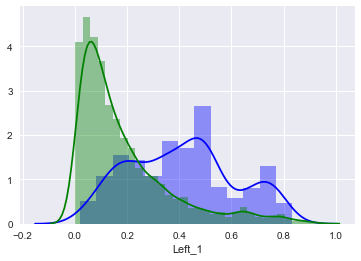

In [35]:
sn.distplot( hr_test_pred[hr_test_pred.actual == 1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

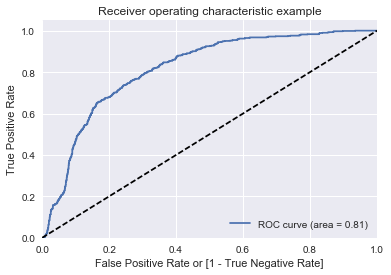

In [36]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
print thresholds[0:10]
print fpr[0:10]
print tpr[0:10]

[ 1.91905401  0.91905401  0.90057484  0.88605895  0.88001362  0.87933851
  0.872333    0.86974563  0.86193267  0.85880292]
[ 0.          0.00087184  0.00130776  0.00174368  0.0021796   0.00261552
  0.00305144  0.00348736  0.00392328  0.0043592 ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [38]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [39]:
round( float( cutoff_prob ), 2 )

0.28

In [40]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [41]:
hr_test_pred[0:10]

index  actual  predicted    Left_0    Left_1  new_labels
0   6723       0          0  0.972035  0.027965           0
1   6473       0          0  0.917792  0.082208           0
2   4679       0          0  0.770442  0.229558           0
3    862       1          0  0.523038  0.476962           1
4   7286       0          0  0.975843  0.024157           0
5   8127       0          0  0.722851  0.277149           0
6   3017       0          0  0.985596  0.014404           0
7   3087       0          1  0.130254  0.869746           1
8   6425       0          0  0.769714  0.230286           0
9   2250       0          1  0.398617  0.601383           1

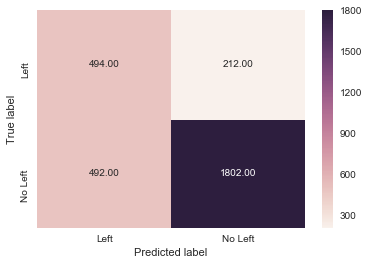

In [42]:

cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')